<a href="https://colab.research.google.com/github/zevan07/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Oliver_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import string
import sklearn

# Linear Algebra Sprint Challenge

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

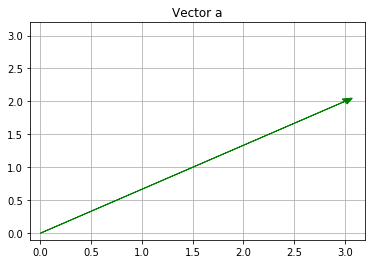

In [119]:
a = [3, 2]

plt.arrow(0,0, a[0], a[1], head_width=.09, head_length=.09, color='green' , zorder = 3)
plt.xlim(-.1, 3.2)
plt.ylim(-.1, 3.2)
plt.title('Vector a')
plt.grid(zorder = 2)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [7]:
# the norm of a vector represents its length
b = np.array([17, -4, -2, 1])

b_norm = np.linalg.norm(b)

print('The length of the vector b is:', b_norm)

The length of the vector b is: 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [120]:

c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

cd_dot = np.dot(c, d)
print('The dot product of the vectors c and d is:', cd_dot
      , '\nthus, their product not being zero, the vectors are not orthogonal.')

The dot product of the vectors c and d is: 42 
thus, their product not being zero, the vectors are not orthogonal.


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [121]:
E = np.array([[7, 4, 2], 
             [1, 3, -1],
             [2, 6, -4]])

inv_E = np.linalg.inv(E)
E_T = np.transpose(E)

print('The inverse of E is:\n', inv_E)
print('The transpose of E is:\n', E_T)

#  confirm inverse by getting identity from product
print('Verification:\n', np.dot(inv_E, E))

The inverse of E is:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
The transpose of E is:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]
Verification:
 [[1.00000000e+00 2.22044605e-16 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [124]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [125]:
# the mean!
df.mean()

customers    1135.714286
snow            2.714286
dtype: float64

In [127]:
# the variance!
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

In [27]:
# the standard deviation!
df.var() ** .5

customers    314.264069
snow           2.927700
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, because variance "punishes" high "spread-out-ness" in the data by summing the squares of the difference between the values and the mean. Standard deviation standardizes the data by taking the square root so that it can be comparable to the original data. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [32]:
# the variance-covariance matrix!
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [128]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
# let's remove the one non-numeric column
df_label = df['Country']
df_data = df.drop('Country', 1)

In [52]:
# StandardScaler standardizes the data in the requested fashion
x = StandardScaler().fit_transform(df_data)
x

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

In [53]:
# verify standard deviation = 1
x.std()

1.0

In [54]:
# verify mean = 0 (or infinitesimally close)
x.mean()

3.2653618371328133e-18

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [129]:
# this function standardizes the data and performs PCA
def pca_creator(df, p_num = 2):
    # set number of PCA components
    pca = PCA(p_num)
    # standardize the data
    x = StandardScaler().fit_transform(df)
    principal_components = pca.fit_transform(x)
    # this is the df that contains pcas
    # it labels PCs x-z and then a-w
    principal_df = pd.DataFrame(principal_components
                                , columns = [str(x) for x in [str(x) for x in (string.ascii_lowercase[-3:]+string.ascii_lowercase[:-3])[:p_num]]])
    return principal_df

pca_df = pca_creator(df_data)
pca_df

,x,y
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


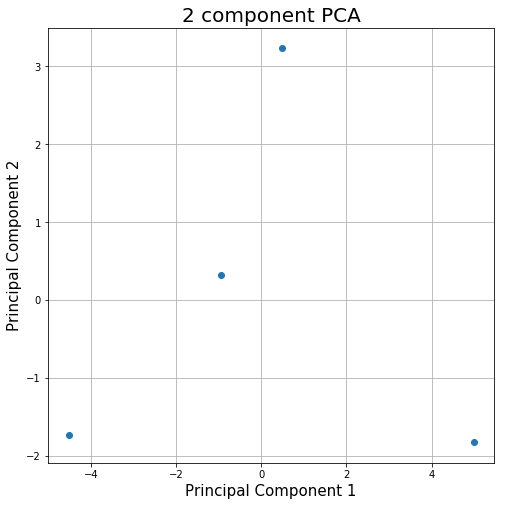

In [57]:
# this function plots the result of the PCA with ready-made labels
def pca_plotter(df, p_num = 2):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    plt.scatter(df.x, df.y)
    ax.grid()
    
pca_plotter(pca_df)

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [58]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


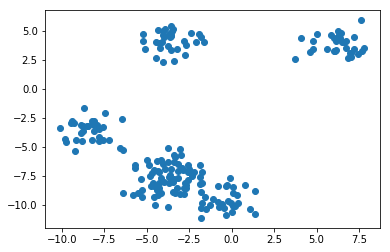

In [98]:
# let's see how the data is shaped
plt.scatter(points.x, points.y);

In [0]:
# it looks like there are 5 distinct clusters
kmeans = sklearn.cluster.KMeans(n_clusters=5)
kmeans.fit(points);

In [0]:
# it looks like there are 5 distinct clusters... but let's make sure
SS_dist = []
K = range(1,10)
for k in K:
    kmeans = sklearn.cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(points)
    SS_dist.append(kmeans.inertia_)
    

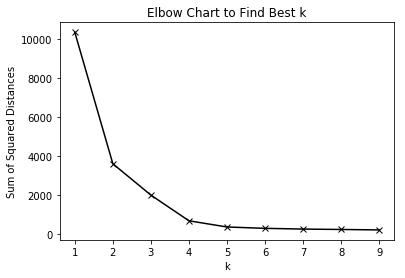

In [137]:
plt.plot(K, SS_dist, 'kx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Chart to Find Best k')
plt.show()

# it looks like the elbow is at 4... 

In [0]:
# but I think the scatterplot makes a better argument for 5 
# (plus - opportunity for more colors for pride month)
kmeans = sklearn.cluster.KMeans(n_clusters=5)
kmeans.fit(points);

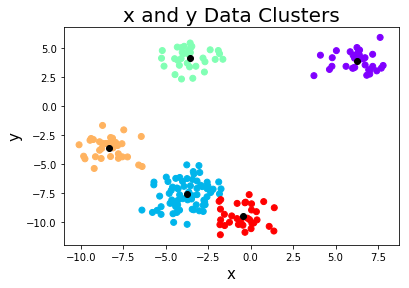

In [118]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# let's plot the colorful clusters
plt.scatter(points['x'], points['y'], c=kmeans.labels_, cmap='rainbow')

# and the cluster centers in black
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

# and add some labeling
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title('x and y Data Clusters', fontsize = 20);